In [1]:
#%load_ext autoreload
#%autoreload 2
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy import units as u
from itertools import cycle

import matplotlib.gridspec as gridspec

%matplotlib inline

In [9]:
mJtomSun = ((1.*u.solMass)/((1.*u.solMass)).to(u.jupiterMass)).value
print(mJtomSun)
rJtorSun = ((1.*u.solRad)/((1.*u.solRad)).to(u.jupiterRad)).value
print(rJtorSun)
AUtorSun = ((1.*u.solRad)/((1.*u.solRad)).to(u.AU)).value
print(AUtorSun)

0.000954594233969
0.102762685065
215.032155671


## Definitions of fields can be found at: https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html

In [43]:
import astroquery.nasa_exoplanet_archive
confirmedPlanets=astroquery.nasa_exoplanet_archive.NasaExoplanetArchive.get_confirmed_planets_table()
#print('available fields:')
#for key in confirmedPlanets.keys():
#    print(key)
a=confirmedPlanets['pl_orbsmax'].value #AU
Mp=confirmedPlanets['pl_bmassj'].value #mJup
Rp=confirmedPlanets['pl_radj'].value #rJup
e=confirmedPlanets['pl_orbeccen']
method=confirmedPlanets['pl_discmethod']
print(np.unique(method))
smass = confirmedPlanets['st_mass'].value #solMass
srad = confirmedPlanets['st_rad'].value #solRad
mult = confirmedPlanets['pl_pnum']
print(np.unique(mult))

nPlanets=method.size
ID=np.arange(nPlanets)
mths=np.zeros(nPlanets)
for i in range(nPlanets):
    if method[i]=='Pulsar Timing':
        mths[i]=1
    elif method[i]=='Radial Velocity':
        mths[i]=2
    elif method[i]=='Transit':
        mths[i]=3
    elif method[i]=='Transit Timing Variations':
        mths[i]=4
    elif method[i]=='Astrometry':
        mths[i]=5
    elif method[i]=='Eclipse Timing Variations':
        mths[i]=6
    elif method[i]=='Microlensing':
        mths[i]=7
    elif method[i]=='Pulsation Timing Variations':
        mths[i]=8
    elif method[i]=='Imaging':
        mths[i]=9
    elif method[i]=='Orbital Brightness Modulation':
        mths[i]=10

        pl_discmethod        
-----------------------------
                   Astrometry
    Eclipse Timing Variations
                      Imaging
                 Microlensing
Orbital Brightness Modulation
                Pulsar Timing
  Pulsation Timing Variations
              Radial Velocity
                      Transit
    Transit Timing Variations
pl_pnum
-------
      1
      2
      3
      4
      5
      6
      7
      8
[ 0.  1.  2. inf nan]


In [11]:
print('Of ',nPlanets,' (+8!) known planets')
print(np.argwhere(mths==3).size,' transiting planets')
print(np.argwhere(mths==2).size,' RV planets')
print(np.argwhere(mths==7).size,' microlensed planets')
print(np.argwhere(mths==9).size,' imaged planets')
print(np.argwhere(mths==4).size,' pulsar timing variations planets')
print(np.argwhere(mths==6).size,' eclipse(?) timing variations planets')
print(np.argwhere(mths==1).size,' pulsar planets')
print(np.argwhere(mths==10).size,' orbit planets')
print(np.argwhere(mths==8).size,' transit timing variations planets')
print(np.argwhere(mths==5).size,' astrometric planets')

Of  3885  (+8!) known planets
3023  transiting planets
707  RV planets
72  microlensed planets
44  imaged planets
15  pulsar timing variations planets
9  eclipse(?) timing variations planets
6  pulsar planets
6  orbit planets
2  transit timing variations planets
1  astrometric planets


In [12]:
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['axes.facecolor']='white'
mpl.rcParams['axes.edgecolor']='k'
mpl.rcParams['axes.linewidth']=3
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['text.color'] = 'k'
#mpl.rcParams['xtick.major.width'] = 2
#mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.color']='k'
mpl.rcParams['ytick.color']='k'
mpl.rcParams['axes.labelcolor']='k'

mpl.rcParams['font.size']=12
mpl.rcParams['xtick.direction']='in'
mpl.rcParams['ytick.direction']='in'
mpl.rcParams['xtick.major.size'] = 5.5
mpl.rcParams['ytick.major.size'] = 5.5
mpl.rcParams['xtick.minor.size'] = 3.5
mpl.rcParams['ytick.minor.size'] = 3.5

In [13]:
def makeCmap(hexColour,zeroColour='#FFFFFF'):
    r0,g0,b0=mpl.colors.hex2color(zeroColour)
    r,g,b=mpl.colors.hex2color(hexColour)
    cdict = {'red':   ((0.0, r0, r0),
                   (1.0, r, r)),
         'green': ((0.0, g0, g0),
                   (1.0, g, g)),
         'blue':  ((0.0, b0, b0),
                   (1.0, b, b))
        }
    cmap = mpl.colors.LinearSegmentedColormap(hexColour,cdict)
    return cmap


def makeGradient(hexColour):
    r,g,b=mpl.colors.hex2color(hexColour)
    cdict = {'red':   ((0.0, r, r),
                   (1.0, r, r)),
         'green': ((0.0, g, g),
                   (1.0, g, g)),
         'blue':  ((0.0, b, b),
                   (1.0, b, b)),
         'alpha':  ((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0))
        }
    cmap = mpl.colors.LinearSegmentedColormap(hexColour,cdict)
    return cmap

"""pulsarCmap=makeCmap('#36747D')#,zeroColour='#91B3B8')
rvCmap=makeCmap('#003049')#,zeroColour='#738E9B')
transitCmap=makeCmap('#7A1809')#,zeroColour='#B68178')
ttvCmap=makeCmap('#BF3E0B')#,zeroColour='#DC9579')
astrometryCmap=makeCmap('#2E8B57')#,zeroColour='#8DBFA3')
etvCmap=makeCmap('#F6AA1C')#,zeroColour='#FAD083')
microlenseCmap=makeCmap('#2168B0')#,zeroColour='#85ACD3')
ptvCmap=makeCmap('#32127A')#,zeroColour='#8F7DB6')
transitCmap=makeCmap('#F6511D')
rvCmap=makeCmap('#0D2C54')
microlenseCmap=makeCmap('#00A6ED')
imageCmap=makeCmap('#FFB400')
otherCmap=makeCmap('#7FB800')
"""
"""maxPlanets=np.max(ID)

colours=np.zeros((nPlanets,4))

#others=np.argwhere((mths!=9)&(mths!=7)&(mths!=3)&(mths!=2))
transits=np.where(mths==3)
rvs=np.argwhere(mths==2)
microlenses=np.argwhere(mths==7)
images=np.argwhere(mths==9)
#pulsars=np.argwhere(mths==1)

pulsarCmap=makeGradient('#36747D')#,zeroColour='#91B3B8')
rvCmap=makeGradient('#003049')#,zeroColour='#738E9B')
transitCmap=makeGradient('#7A1809')#,zeroColour='#B68178')
ttvCmap=makeGradient('#BF3E0B')#,zeroColour='#DC9579')
astrometryCmap=makeGradient('#2E8B57')#,zeroColour='#8DBFA3')
etvCmap=makeGradient('#F6AA1C')#,zeroColour='#FAD083')
microlenseCmap=makeGradient('#2168B0')#,zeroColour='#85ACD3')
ptvCmap=makeGradient('#32127A')#,zeroColour='#8F7DB6')
transitCmap=makeGradient('#F6511D')
rvCmap=makeGradient('#0D2C54')
microlenseCmap=makeGradient('#00A6ED')
imageCmap=makeGradient('#FFB400')
otherCmap=makeGradient('#7FB800')

colours=otherCmap(0.25+(0.75*ID/maxPlanets))
colours[transits]=transitCmap(0.25+(0.75*ID[transits]/maxPlanets))
colours[rvs]=rvCmap(0.25+(0.75*ID[rvs]/maxPlanets))
colours[microlenses]=microlenseCmap(0.25+(0.75*ID[microlenses]/maxPlanets))
colours[images]=imageCmap(0.25+(0.75*ID[images]/maxPlanets))


multColoursList = ['#36747D','#003049','#7A1809','#BF3E0B','#2E8B57','#F6AA1C','#EE4266','#540D6E']

multColours = [makeGradient(i) for i in multColoursList]

colours = otherCmap(0.999*np.ones_like(ID))

for j in range(0,np.max(mult)):
    colours[mult==(j+1)] = multColours[j](0.999*np.ones_like(np.arange(0,len(ID))[mult==(j+1)]))
"""

"""colours=otherCmap(0.999*np.ones_like(ID))
colours[transits]=transitCmap(0.999*np.ones_like(transits))
colours[rvs]=rvCmap(0.999*np.ones_like(rvs))
colours[microlenses]=microlenseCmap(0.999*np.ones_like(microlenses))
colours[images]=imageCmap(0.999*np.ones_like(images))"""

'colours=otherCmap(0.999*np.ones_like(ID))\ncolours[transits]=transitCmap(0.999*np.ones_like(transits))\ncolours[rvs]=rvCmap(0.999*np.ones_like(rvs))\ncolours[microlenses]=microlenseCmap(0.999*np.ones_like(microlenses))\ncolours[images]=imageCmap(0.999*np.ones_like(images))'

In [60]:
def makePlotColours(mappableList,coloursList):
    """
    mappableArray = a list of discrete values, each corresponding to a unique color (zero-indexed)
    coloursList = list of desired colors. Ideally should be at least as many colours as there are unique
                  entries in mappableArray.
    """
    
    zidx = []
    uniqueMappableList = np.unique(mappableList)
    for j in range(len(mappableList)):
        for i,entry in enumerate(uniqueMappableList):
            if mappableList[j] == entry:
                zidx.append(i)
    
    zidx = np.array((zidx))
    uniqueVals = len(np.unique(zidx))
    
    cidx = 0
    colourMaps = []
    cycledColours = []
    for c in cycle(coloursList):
        colourMaps.append(makeGradient(c))
        cycledColours.append(c)
        cidx+=1
        if cidx > uniqueVals: 
            break
    
    blankCmap=makeGradient('#FFFFFF')
    colours = blankCmap(0.999*np.ones_like(zidx))

    for j in range(0,uniqueVals):
        colours[zidx==j] = colourMaps[j](0.999*np.ones_like(np.arange(0,len(zidx))[zidx==j]))

    return colourMaps,colours,cycledColours,list(uniqueMappableList)

In [64]:
def makePlot(ax, xdata, ydata, colours, xlabel, ylabel, sizes=100,
             legendTitle=None,legendEntries=None, legendColours=None,
             xlim=[], ylim=[],xscale="linear",yscale="linear",alpha=1):
    ax.scatter(xdata,ydata,c=colours,s=sizes)
    
    nonans = (np.isfinite(xdata) & np.isfinite(ydata))
    xdata=xdata[nonans]
    ydata=ydata[nonans]
    colours=colours[nonans]
    
    xmin = np.min(xdata[xdata > 0.])#.value
    xmax = np.max(xdata)#.value
    
    ymin = np.min(ydata[ydata > 0.])#.value
    ymax = np.max(ydata)#.value

    if not xlim:
        if xscale=="log":
            ax.set_xlim(0.1*xmin,10.*xmax)
        else:
            ax.set_xlim(0.95*xmin,1.05*xmax)
    else:
        ax.set_xlim(xlim)
        
    if not ylim:
        if yscale=="log":
            ax.set_ylim(0.1*ymin,10.*ymax)
        else:
            ax.set_ylim(0.95*ymin,1.05*ymax)
    else:
        ax.set_ylim(ylim)
    
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    
    ax.set_xlabel(xlabel,fontsize=24)
    ax.set_ylabel(ylabel,fontsize=24)
    ax.tick_params(labelsize=18)
    
    if legendEntries is not None:
        if xscale=="log":
            minx = 1.e-7*xmin
        else:
            minx = -100*xmin
                
        if yscale=="log":
            miny = 1.e-7*ymin
        else:
            miny = -100*ymin
            
        for i in range(0,len(legendEntries)):
            ax.scatter([minx,minx],[miny,miny],s=200,c=legendColours[i],label='{0}'.format(legendEntries[i]))

        leg=ax.legend(loc=0,ncol=1,frameon=False,fontsize=20,title=legendTitle)
        leg.get_title().set_fontsize('22')
    return 

/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide
/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide
/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide
/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide


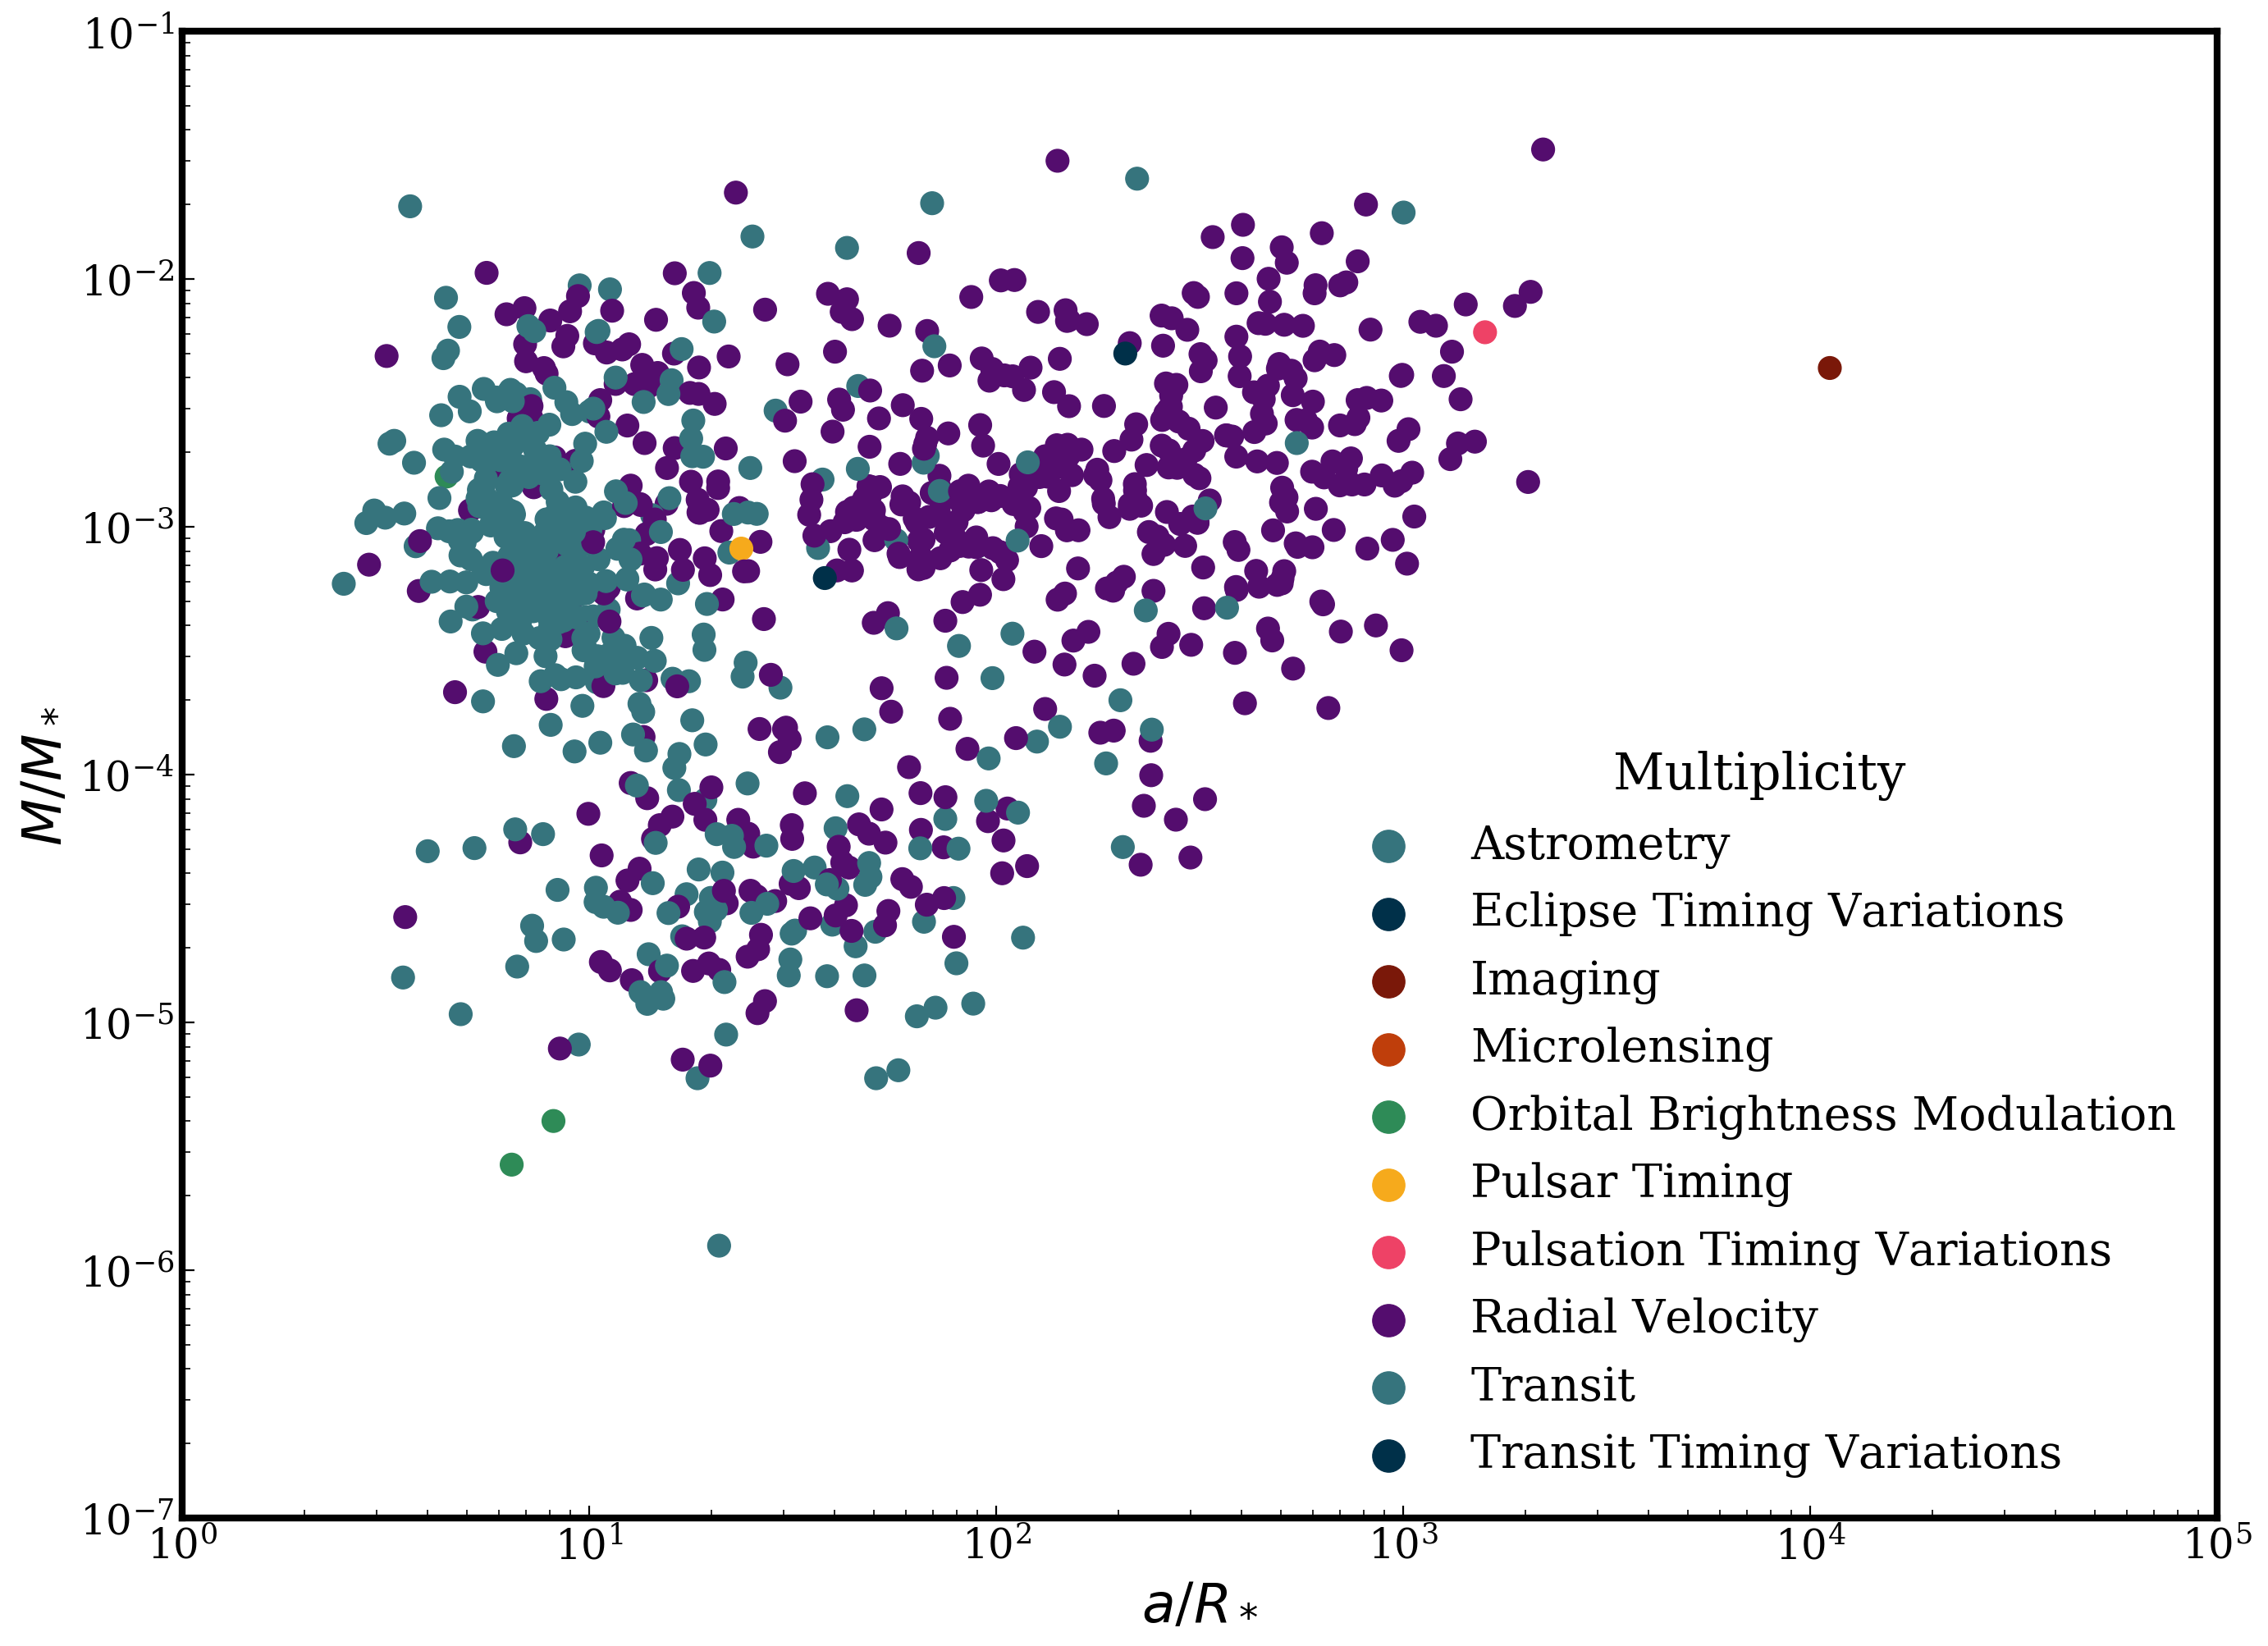

In [65]:
multColoursList = ['#36747D','#003049','#7A1809','#BF3E0B','#2E8B57','#F6AA1C','#EE4266','#540D6E']
colourMaps,colours,legendColours,legendEntries = makePlotColours(method,multColoursList)

fig = plt.figure(figsize=(16,12))
plot = plt.gca()

makePlot(plot,
        xdata=(a*AUtorSun)/srad,
        ydata=(Mp*mJtomSun)/smass,
        sizes=100,
        colours=colours,
        xlim=[1.,1.e5],
        ylim=[1.e-7,1.e-1],
        legendTitle="Multiplicity",
        legendEntries=legendEntries,
        legendColours=legendColours,
        xscale="log",
        yscale="log",
        xlabel=r'$a$/$R_*$',
        ylabel=r'$M$/$M_*$')

plt.show()

/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in true_divide
/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide
/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in true_divide
/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide
/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in true_divide
/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in true_divide
/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykern

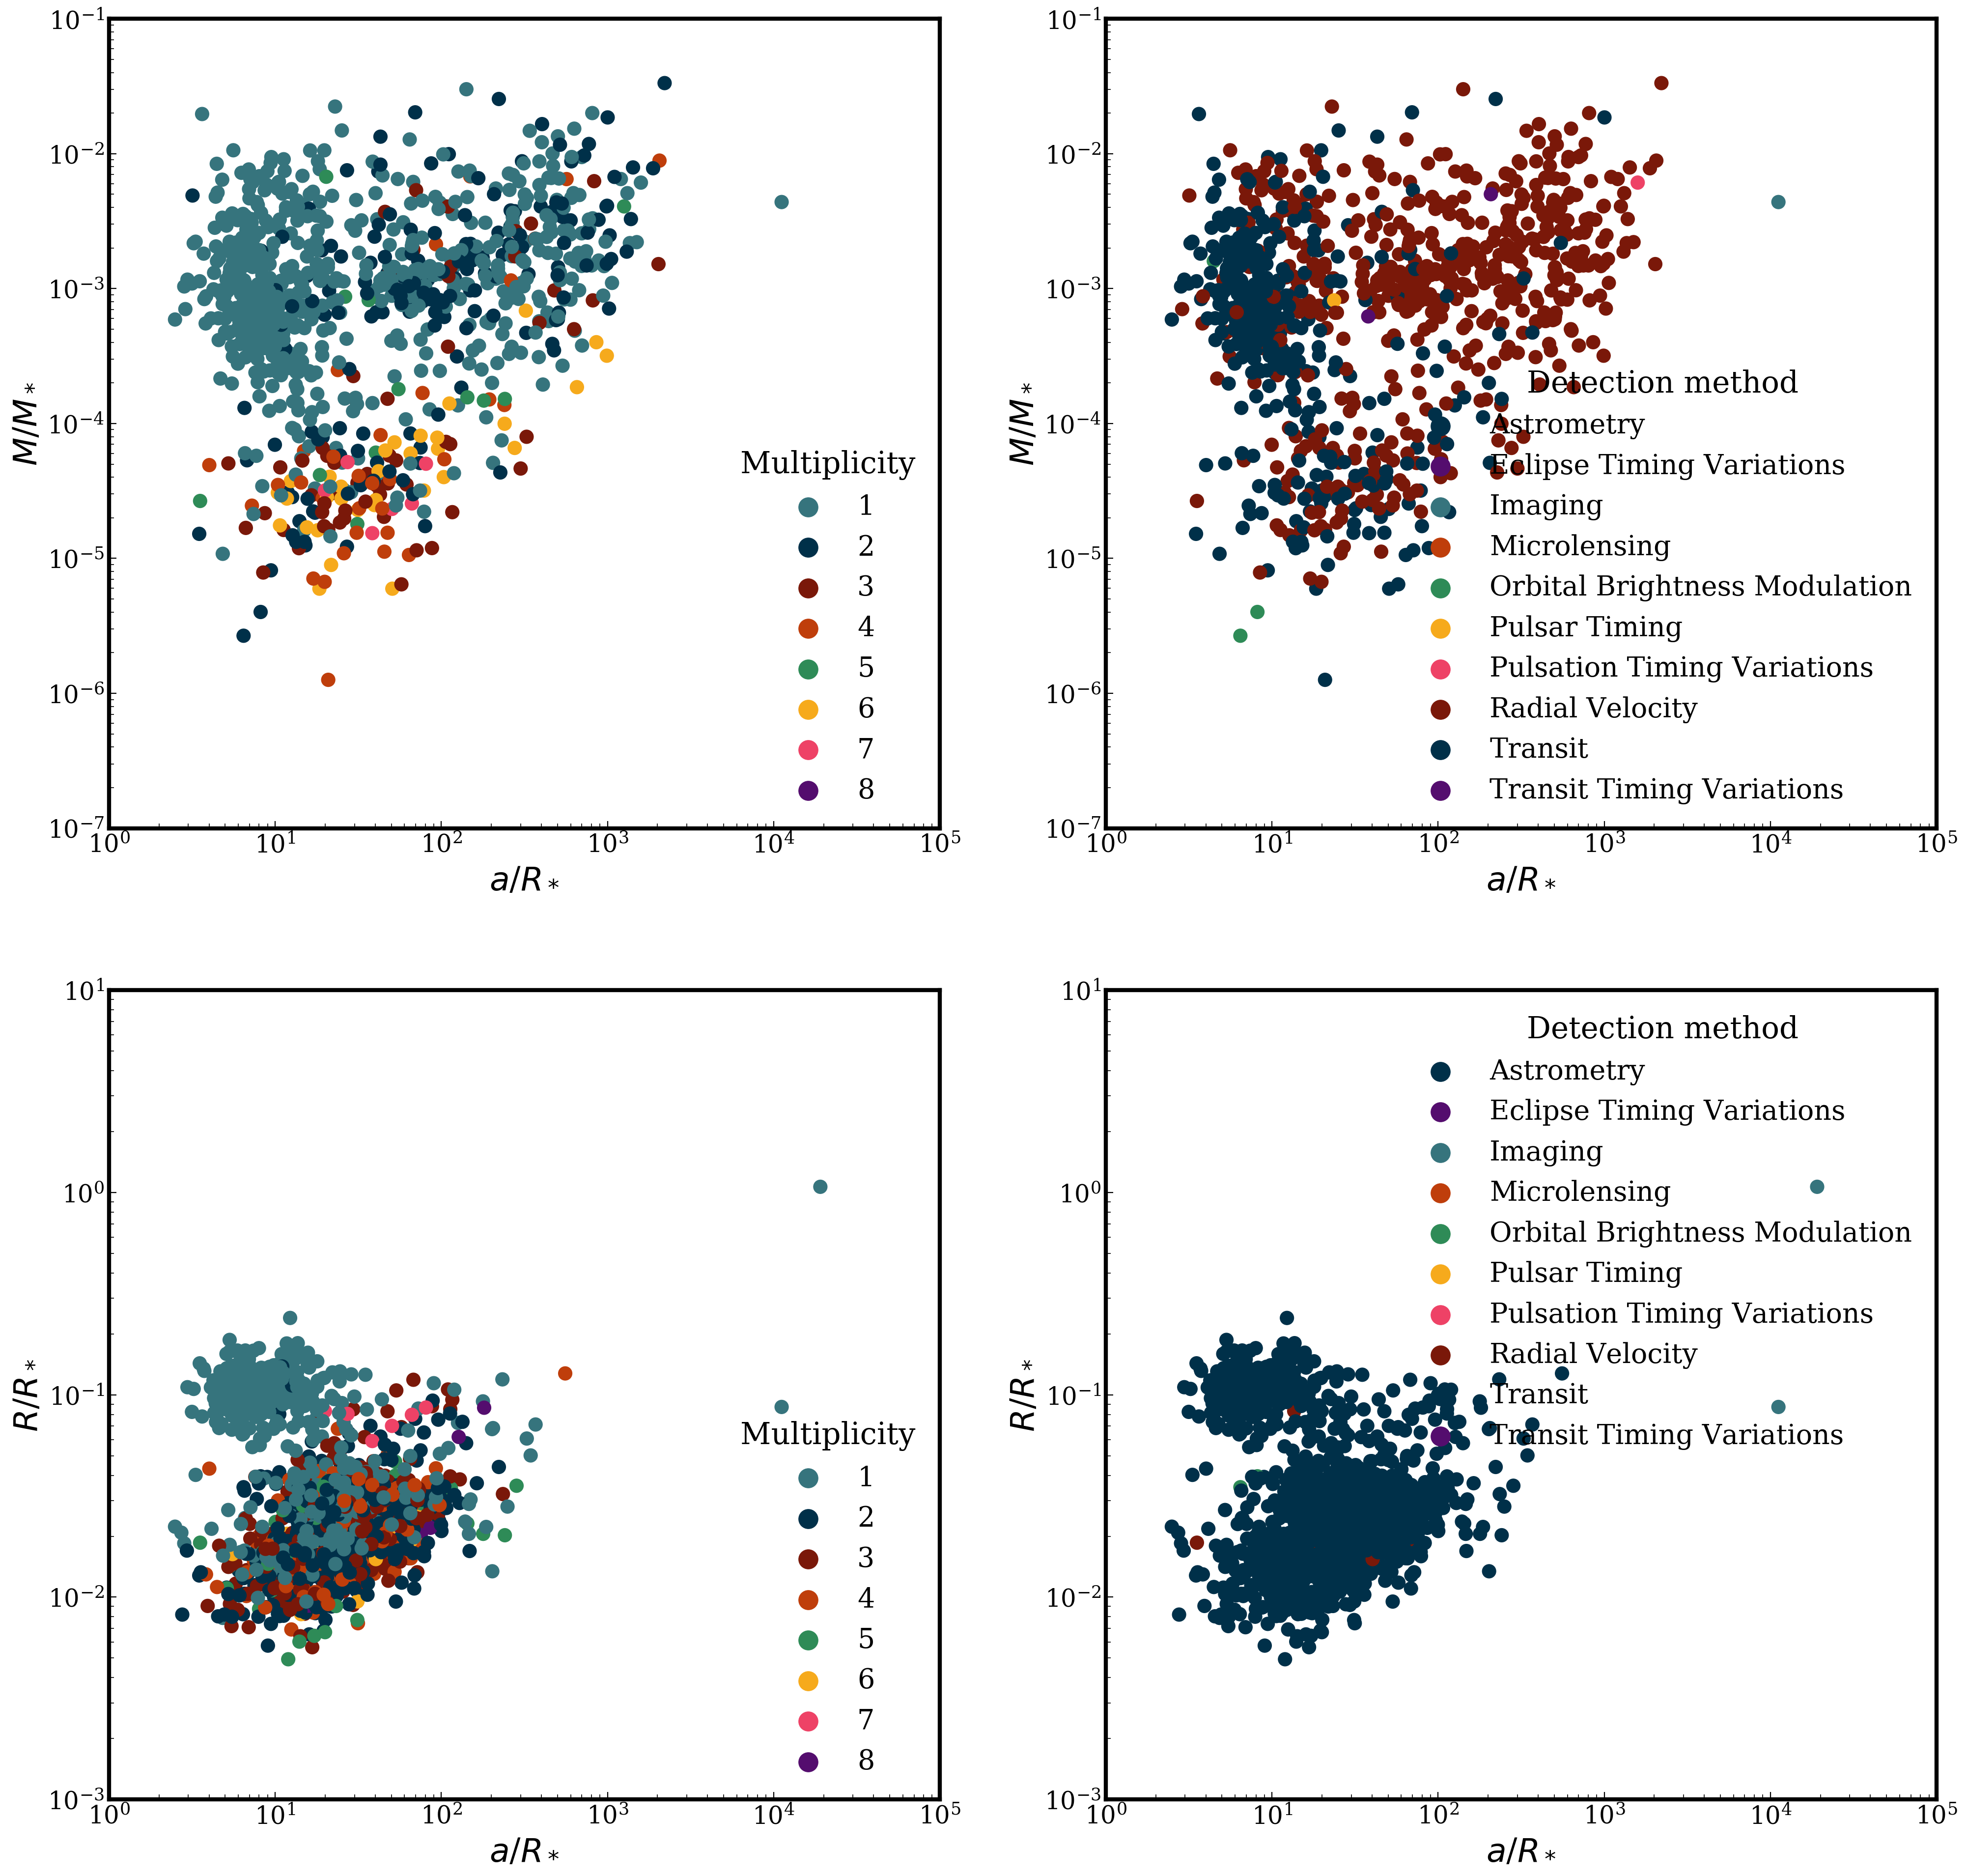

In [67]:
multColoursList = ['#36747D','#003049','#7A1809','#BF3E0B','#2E8B57','#F6AA1C','#EE4266','#540D6E']
methColoursList = ['#003049','#540D6E','#36747D','#BF3E0B','#2E8B57','#F6AA1C','#EE4266','#7A1809']

mult_colourMaps,mult_colours,mult_legendColours,mult_legendEntries = makePlotColours(mult,multColoursList)
meth_colourMaps,meth_colours,meth_legendColours,meth_legendEntries = makePlotColours(method,methColoursList)


fig = plt.figure(figsize=(24,24))
gs = gridspec.GridSpec(2, 2)

ax00 = plt.subplot(gs[0, 0])
makePlot(ax00,
        xdata=(a*AUtorSun)/srad,
        ydata=(Mp*mJtomSun)/smass,
        colours=mult_colours,
        xlim=[1.,1.e5],
        ylim=[1.e-7,1.e-1],
        legendTitle="Multiplicity",
        legendEntries=mult_legendEntries,
        legendColours=mult_legendColours,
        xscale="log",
        yscale="log",
        xlabel=r'$a$/$R_*$',
        ylabel=r'$M$/$M_*$')

ax01 = plt.subplot(gs[0, 1])
makePlot(ax01,
        xdata=(a*AUtorSun)/srad,
        ydata=(Mp*mJtomSun)/smass,
        colours=meth_colours,
        xlim=[1.,1.e5],
        ylim=[1.e-7,1.e-1],
        legendTitle="Detection method",
        legendEntries=meth_legendEntries,
        legendColours=meth_legendColours,
        xscale="log",
        yscale="log",
        xlabel=r'$a$/$R_*$',
        ylabel=r'$M$/$M_*$')


ax10 = plt.subplot(gs[1, 0])
makePlot(ax10,
        xdata=(a*AUtorSun)/srad,
        ydata=(Rp*rJtorSun)/srad,
        colours=mult_colours,
        xlim=[1.,1.e5],
        ylim=[1.e-3,1.e1],
        legendTitle="Multiplicity",
        legendEntries=mult_legendEntries,
        legendColours=mult_legendColours,
        xscale="log",
        yscale="log",
        xlabel=r'$a$/$R_*$',
        ylabel=r'$R$/$R_*$')

ax11 = plt.subplot(gs[1, 1])
makePlot(ax11,
        xdata=(a*AUtorSun)/srad,
        ydata=(Rp*rJtorSun)/srad,
        colours=meth_colours,
        xlim=[1.,1.e5],
        ylim=[1.e-3,1.e1],
        legendTitle="Detection method",
        legendEntries=meth_legendEntries,
        legendColours=meth_legendColours,
        xscale="log",
        yscale="log",
        xlabel=r'$a$/$R_*$',
        ylabel=r'$R$/$R_*$')

plt.show()

In [ ]:
aTicks=[1/215,0.387,1,5.2,30.1,100,5000]
aLabels=[r'$R_\odot$','Mercury','Earth','Jupiter','Neptune','Eris','Oort Cloud']
mTicks=[0.00033,1/317,0.1,1]
mLabels=['Mars','Earth','Neptune','Jupiter']
eTicks=[0.0086,0.0167,0.0484,0.2056,0.9671]
eLabels=['Neptune','Earth','Jupiter','Mercury',"Halley's Comet"]
eSolar=[0.2056,0.0068,0.0167,0.0934,0.0484,0.0541,0.0472,0.0086]
mSolar=[1/5750,0.002,0.003,0.00033,1,0.3,0.046,0.054]
aSolar=[0.387,0.72,1,1.52,5.2,9.58,19.23,30.1]

sradSolar = np.ones_like(aSolar)
smassSolar = np.ones_like(mSolar)

In [ ]:
ampFig = plt.figure(figsize=(16,12))
ampPlot=plt.gca()
"""
aPlot = ampPlot.twiny()
aPlot.set_xscale('log')
aPlot.set_xticks(aTicks)
aPlot.set_xticklabels(aLabels,fontsize=16)
aPlot.set_xlim(aTicks[0],aTicks[-1])
aPlot.grid(False)
mPlot= ampPlot.twinx()
mPlot.grid(False)
mPlot.set_yscale('log')
mPlot.set_yticks(mTicks)
mPlot.set_yticklabels(mLabels,fontsize=16,rotation=270)
mPlot.set_ylim(mTicks[0],50)"""

ampPlot.scatter((a*AUtorSun)/srad,(Mp*mJtomSun)/smass,s=100,c=colours,zorder=3)
ampPlot.set_xscale('log')
ampPlot.set_xlim(1,1.e5)
ampPlot.set_xlabel(r'$a$/$R_*$',fontsize=24)
ampPlot.tick_params(labelsize=18)
#ampPlot.set_xticks(aTicks)
#ampPlot.set_xticklabels(aLabels,fontsize=14)

ampPlot.set_yscale('log')
ampPlot.set_ylim(1.e-7,0.1)
ampPlot.set_ylabel(r'$M$/$M_*$',fontsize=24)
"""
ampPlot.scatter([1e-20,1e-20],[1,1],s=200,c=transitCmap(1.),label='Transits')
ampPlot.scatter([1e-20,1e-20],[1,1],s=200,c=rvCmap(1.),label='Radial Velocities')
ampPlot.scatter([1e-20,1e-20],[1,1],s=200,c=microlenseCmap(1.),label='Microlensing')
ampPlot.scatter([1e-20,1e-20],[1,1],s=200,c=imageCmap(1.),label='Direct Imaging')
ampPlot.scatter([1e-20,1e-20],[1,1],s=200,c=otherCmap(1.),label='Other')
"""
for i in range(0,np.max(mult)):
    ampPlot.scatter([1e-20,1e-20],[1,1],s=200,c=colourMaps[i](1.),label='{0}-planet'.format(i+1))


ampPlot.scatter((np.array(aSolar)*AUtorSun),(np.array(mSolar)*mJtomSun),s=200,facecolors='none', edgecolors='k',lw=2,label='Solar System')
leg=ampPlot.legend(loc=0,ncol=1,frameon=False,fontsize=20,title="Multiplicity")
leg.get_title().set_fontsize('22')
#plt.show()
plt.savefig('planets.png')

In [ ]:
aeFig = plt.figure(figsize=(16,12))
aePlot=plt.gca()

aPlot = ampPlot.twiny()
aPlot.set_xscale('log')
aPlot.set_xticks(aTicks)
aPlot.set_xticklabels(aLabels,fontsize=16)
aPlot.set_xlim(aTicks[0],1e2)
aPlot.grid(False)
ePlot= ampPlot.twinx()
ePlot.grid(False)
ePlot.set_yscale('log')
ePlot.set_yticks(eTicks)
ePlot.set_yticklabels(eLabels,fontsize=16,rotation=270)
ePlot.set_ylim(1e-4,1)

aePlot.scatter(a,e,s=100,c=colours,zorder=3)
aePlot.set_xscale('log')
aePlot.set_xlim(aTicks[0],1e2)
aePlot.set_xlabel('Orbital Radius $[AU]$',fontsize=24)
aePlot.tick_params(labelsize=18)
#ampPlot.set_xticks(aTicks)
#ampPlot.set_xticklabels(aLabels,fontsize=14)

aePlot.set_yscale('log')
aePlot.set_ylim(1e-4,1)
aePlot.set_ylabel('Eccentricity',fontsize=24)

aePlot.scatter([1e-20,1e-20],[1,1],s=200,c=transitCmap(1.),label='Transits')
aePlot.scatter([1e-20,1e-20],[1,1],s=200,c=rvCmap(1.),label='Radial Velocities')
aePlot.scatter([1e-20,1e-20],[1,1],s=200,c=microlenseCmap(1.),label='Microlensing')
aePlot.scatter([1e-20,1e-20],[1,1],s=200,c=imageCmap(1.),label='Direct Imaging')
aePlot.scatter([1e-20,1e-20],[1,1],s=200,c=otherCmap(1.),label='Other')
aePlot.scatter(aSolar,mSolar,s=200,facecolors='none', edgecolors='k',lw=2,label='Solar System')
leg=aePlot.legend(loc=0,ncol=1,frameon=False,fontsize=20,title="Method of Detection")
leg.get_title().set_fontsize('22')
#plt.show()
plt.savefig('planets_ae.png')